In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/My Drive

[Errno 2] No such file or directory: '/content/gdrive/My Drive'
/content


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mush = pd.read_csv('mushrooms.csv')

In [ ]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
mush.shape

(8124, 23)

# 결측치 확인

In [ ]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
mush['stalk-root'].value_counts() # 높은 비율이 Missing, 해당 컬럼 삭제

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [ ]:
del mush['stalk-root']

# EDA

In [ ]:
len(mush.columns)

22

In [ ]:
mush.columns[2]

'cap-surface'

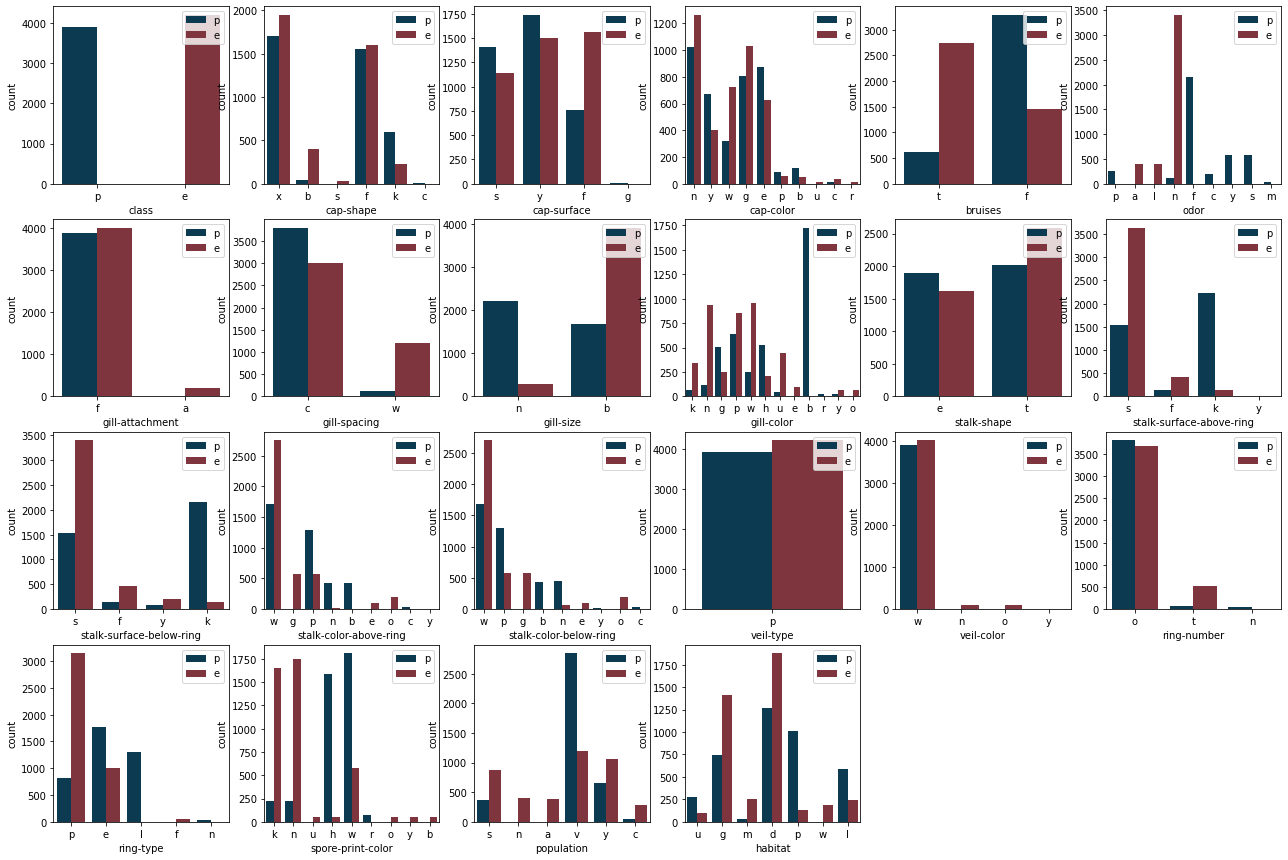

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (22,15))
gs = GridSpec(nrows=4, ncols=6)
bar_width = 0.35
alpha = 0.5

for i in range(4):
    for j in range(6):
        k = i*6 + j
        if (k >= 22): 
            break;
        # globals()['ax{}'.format(i)] = fig.add_subplot(gs[i, j])
        ax = fig.add_subplot(gs[i, j])
        sns.countplot(x=mush.columns[k], hue="class", data=mush, palette =['#003f5c', '#8A2935'], ax=ax)
        ax.legend(labels=mush['class'].unique(), loc="upper right")



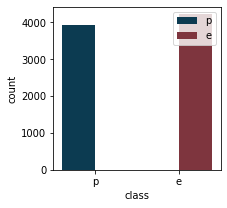

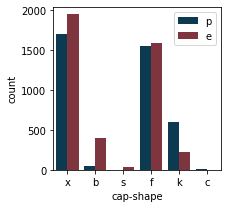

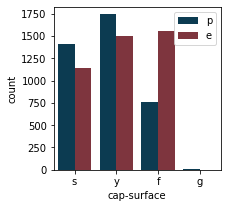

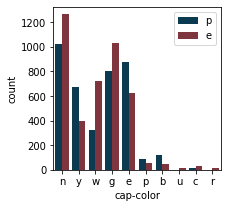

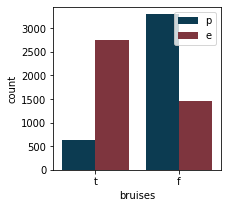

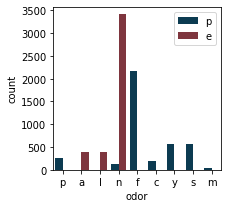

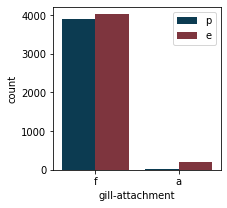

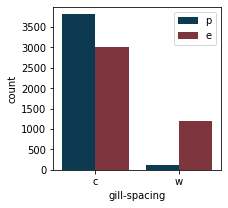

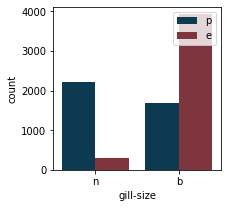

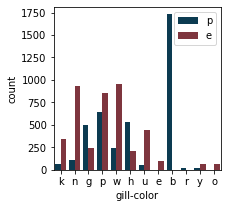

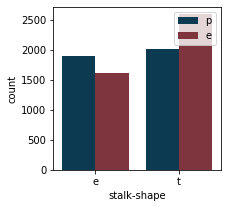

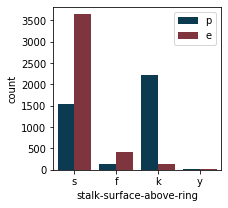

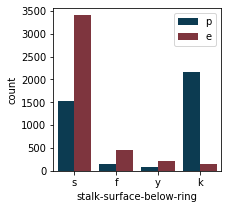

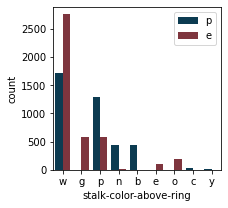

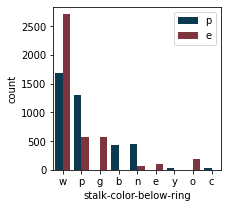

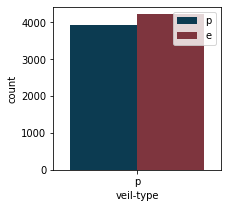

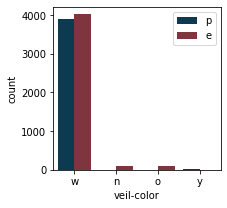

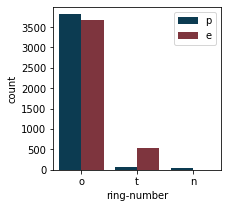

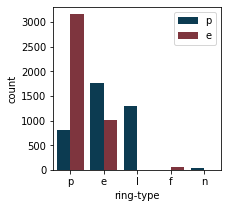

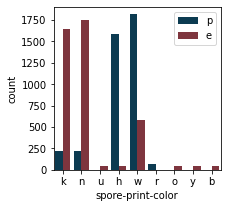

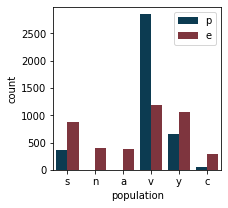

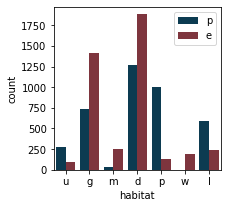

In [ ]:
for i in mush.columns:
    plt.figure(figsize=(3,3))
    sns.countplot(x=i, hue="class", data=mush, palette =['#003f5c', '#8A2935'])
    plt.legend(labels=mush['class'].unique(), loc="upper right") # subplot 지정하고 각각 넣으면 될듯..
    plt.show()

In [ ]:
# 영향력 높은 변수 확인

# 중요 변수 탐색 1 - LabelEncoder



In [ ]:
from sklearn.preprocessing import LabelEncoder

def create_list_of_encoded_values(df):
    
    le = LabelEncoder()
    d_list = [] 
    
    for col in df.columns:
        le.fit(df[col]) 
        d_list.append(dict(zip(le.classes_, le.transform(le.classes_))))
        
    return d_list 

def encode_datasets(d_list, df):
    i=0
    for col in df.columns:
        df[col].replace(d_list[i], inplace=True)
        i+=1
        
    return (df)\

In [ ]:
list_encoded_values = create_list_of_encoded_values(mush)

mush_lenc = encode_datasets(list_encoded_values, mush)

In [ ]:
corr1 = mush_lenc.corr()['class'].sort_values()

-0.5015303774076972

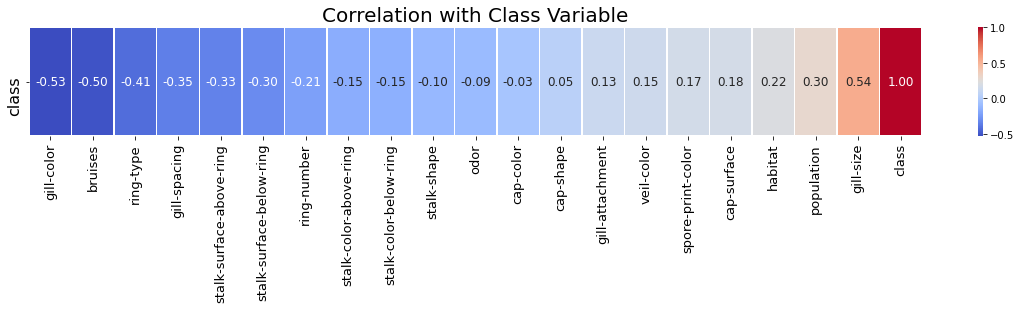

In [ ]:
plt.figure(figsize=(20,2))
sns.heatmap(data = pd.DataFrame(corr1).T, annot=True, annot_kws={"size": 12}, fmt = '.2f', linewidths=0.5, cmap='coolwarm') # .T
plt.title('Correlation with Class Variable', fontsize=20)
plt.yticks(rotation=90)
plt.tick_params(axis="x", labelsize=13)
plt.tick_params(axis="y", labelsize=16)
plt.show()

**Gill size, gill color, bruises and ring type** 가 중요 변수로 보임
<br><br>

[관련 사전 정보]

중요 변수, 색이 화려한지, 주름진(gill) 것의 크기, 멍이 들었는지, 대에 띠 모양

독버섯은 bruises가 없고, 식용버섯은 많음

독버섯은 색이 화려, 식용버섯은 반대

독버섯의 ring이 evanescent 또는 large, 식용버섯은 pendant 또는 evanescent

독버섯은 주로 핑크, 회식, 황토색, 초콜렛색이고, 식용버섯은 주로 보라색, 갈색, 핑크색, 흰색 이다.

(참고) 독버섯은 주로 대에 띠가 없고, 식용버섯은 주로 띠가 있음

(참고) 독버섯은 broad, 식용버섯은 narrow


In [ ]:
mush['veil-type'].value_counts() # veil-type은 독성이나 식용이나 똑같음, 이 컬럼도 삭제 가능

0    8124
Name: veil-type, dtype: int64

In [ ]:
del mush['veil-type'] 

# 중요 변수 탐색 2 - ExtraTree

Text(0.5, 1.0, 'Features and their Importance')

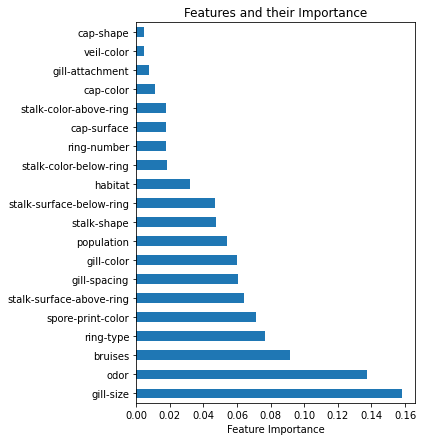

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

plt.figure(figsize=(5,7))

et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(mush_lenc.drop('class', axis=1), mush_lenc['class'])

pd.Series(et_clf.feature_importances_, index=mush_lenc.drop('class', axis=1).columns).nlargest(22).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Features and their Importance')